In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


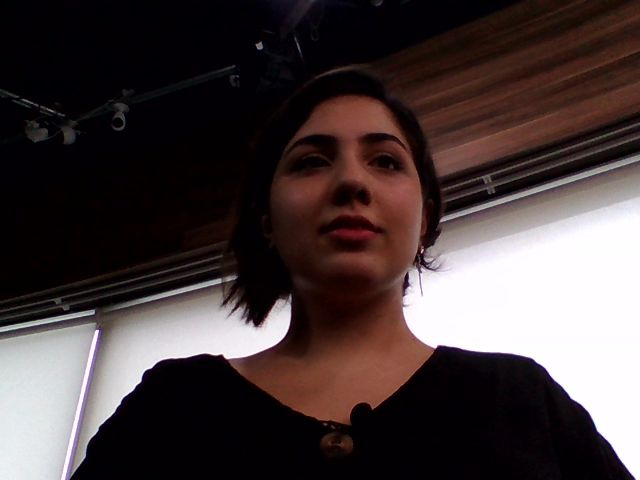

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
image = cv2.imread('photo.jpg')

In [ ]:
# https://docs.opencv.org/3.4/d6/d6d/classcv_1_1ximgproc_1_1segmentation_1_1SelectiveSearchSegmentation.html

ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)

In [ ]:
ss.switchToSelectiveSearchFast()

In [ ]:
retangulos = ss.process()

In [ ]:
retangulos.shape

(2269, 4)

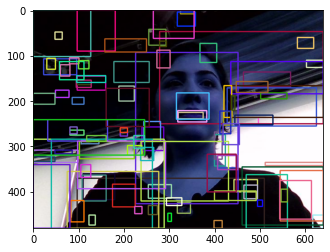

In [ ]:
# vamos pegar k retângulos aleatórios e plotar
k = 100
retangulos_aleatorios = retangulos[np.random.randint(low = 0, high = retangulos.shape[0], size = k),]
output = image.copy()
for (a, b, w, h) in retangulos[0:100,]:
		color = [np.random.randint(0, 255) for j in range(0, 3)]
		cv2.rectangle(output, (a, b), (a + w, b + h), color, 2)

plt.imshow(output)

In [ ]:
ss.switchToSelectiveSearchQuality()

In [ ]:
retangulos = ss.process()

In [ ]:
retangulos.shape

(5904, 4)

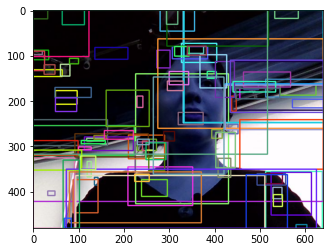

In [ ]:
# vamos pegar k retângulos aleatórios e plotar
k = 100
retangulos_aleatorios = retangulos[np.random.randint(low = 0, high = retangulos.shape[0], size = k),]
output = image.copy()
for (a, b, w, h) in retangulos[0:100,]:
		color = [np.random.randint(0, 255) for j in range(0, 3)]
		cv2.rectangle(output, (a, b), (a + w, b + h), color, 2)

plt.imshow(output)

In [ ]:
retangulos[150]

array([122, 355, 190,  61], dtype=int32)